In [29]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
df=pd.read_excel("E:\ExcelR\Data Science\Assignment\Forcasting\CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df['Month'] = pd.to_datetime(df['Quarter'].str[-2:] + df['Quarter'].str[:2])

In [4]:
df

,Quarter,Sales,Month
0,Q1_86,1734.827000,2086-01-01
1,Q2_86,2244.960999,2086-04-01
2,Q3_86,2533.804993,2086-07-01
3,Q4_86,2154.962997,2086-10-01
4,Q1_87,1547.818996,2087-01-01
5,Q2_87,2104.411995,2087-04-01
6,Q3_87,2014.362999,2087-07-01
7,Q4_87,1991.746998,2087-10-01
8,Q1_88,1869.049999,2088-01-01
9,Q2_88,2313.631996,2088-04-01


In [5]:
df.shape

(42, 3)

In [6]:
df["month"]= df.Month.dt.strftime("%b") #month extraction

In [7]:
df["year"]= df.Month.dt.strftime("%Y")   #year extraction

In [8]:
df

,Quarter,Sales,Month,month,year
0,Q1_86,1734.827000,2086-01-01,Jan,2086
1,Q2_86,2244.960999,2086-04-01,Apr,2086
2,Q3_86,2533.804993,2086-07-01,Jul,2086
3,Q4_86,2154.962997,2086-10-01,Oct,2086
4,Q1_87,1547.818996,2087-01-01,Jan,2087
5,Q2_87,2104.411995,2087-04-01,Apr,2087
6,Q3_87,2014.362999,2087-07-01,Jul,2087
7,Q4_87,1991.746998,2087-10-01,Oct,2087
8,Q1_88,1869.049999,2088-01-01,Jan,2088
9,Q2_88,2313.631996,2088-04-01,Apr,2088


<Axes: xlabel='month', ylabel='year'>

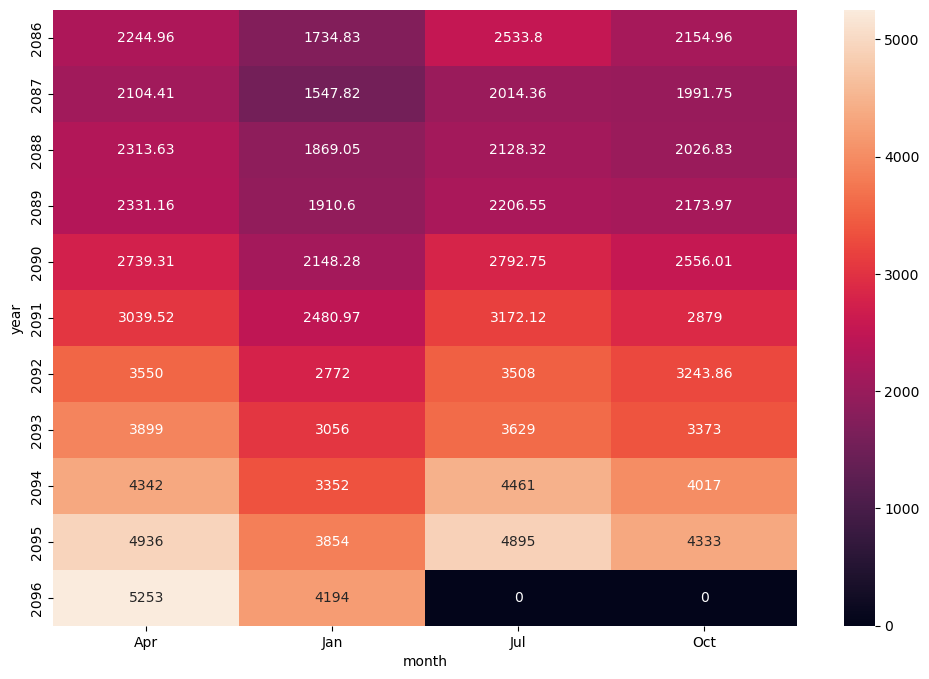

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values='Sales',index='year',columns='month',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt ="g") #fmt is format of grid value

In [10]:
heatmap_y_month

month,Apr,Jan,Jul,Oct
year,,,,
2086,2244.960999,1734.827000,2533.804993,2154.962997
2087,2104.411995,1547.818996,2014.362999,1991.746998
2088,2313.631996,1869.049999,2128.320000,2026.828999
2089,2331.164993,1910.603996,2206.549995,2173.967995
2090,2739.307999,2148.278000,2792.753998,2556.009995
2091,3039.522995,2480.973999,3172.115997,2879.000999
2092,3550.000000,2772.000000,3508.000000,3243.859993
2093,3899.000000,3056.000000,3629.000000,3373.000000
2094,4342.000000,3352.000000,4461.000000,4017.000000


<Axes: xlabel='year'>

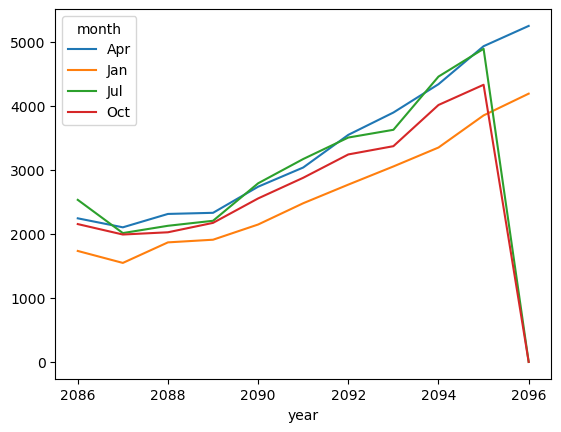

In [11]:
heatmap_y_month.plot()

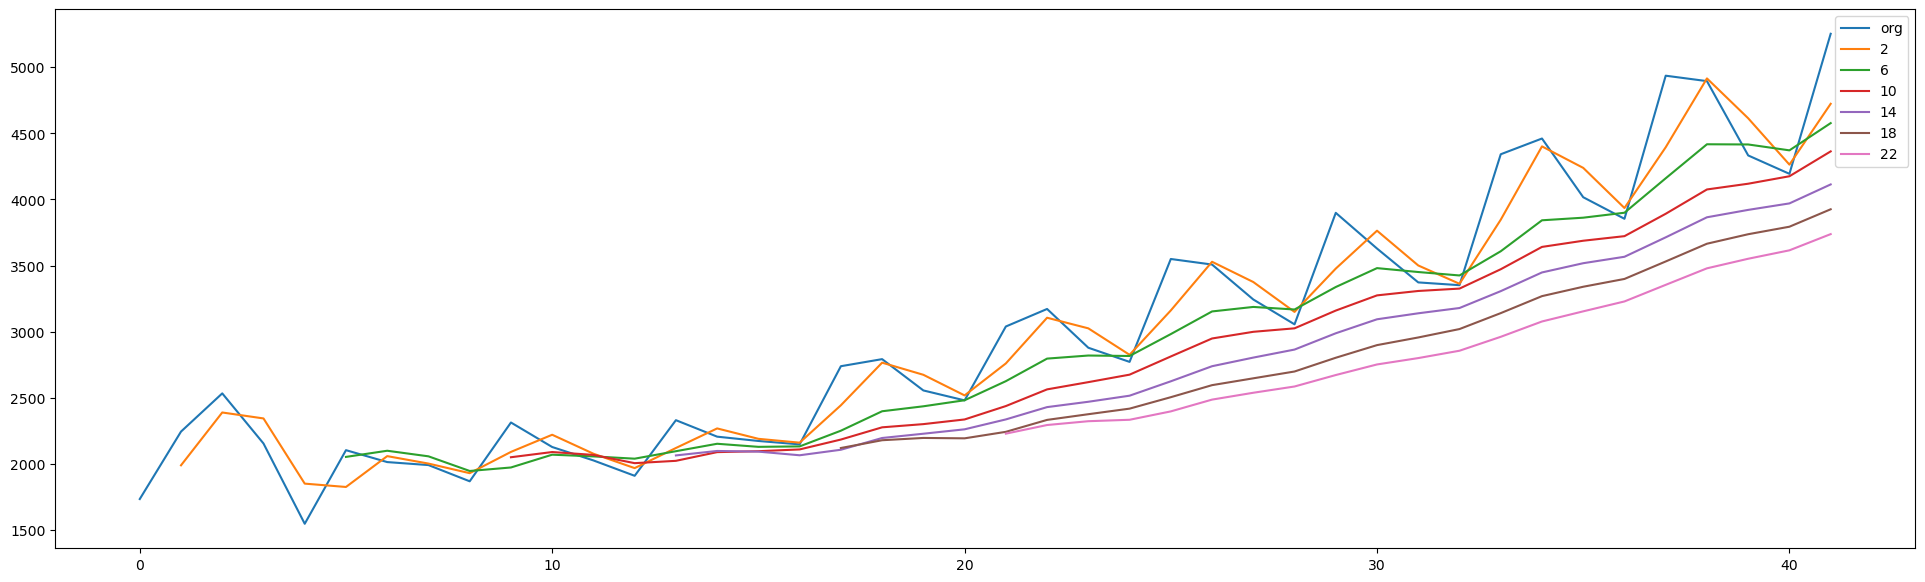

In [12]:
plt.figure(figsize=(24,7))
df.Sales.plot(label="org")
for i in range(2,24,4):
  df['Sales'].rolling(i).mean().plot(label=str(i))
  plt.legend(loc='best')

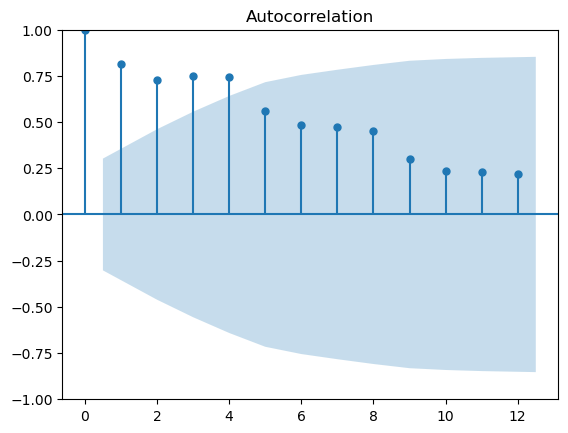

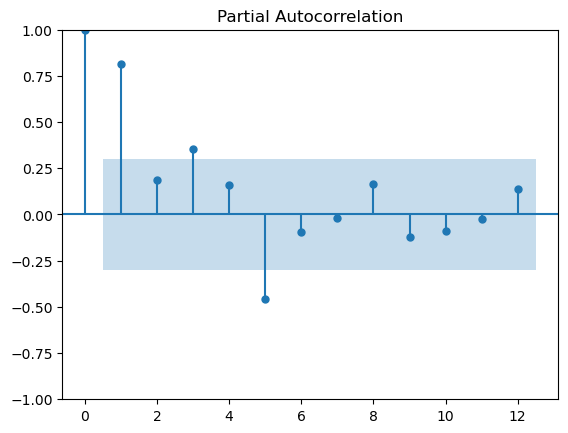

In [13]:
# ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

<Axes: xlabel='month', ylabel='Sales'>

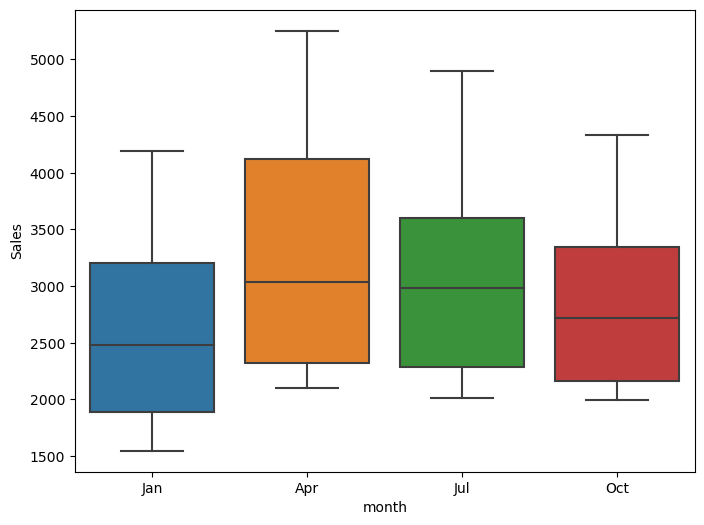

In [14]:
#boxplot for ever
plt.figure(figsize=(8,6))
#plt subplot
sns.boxplot(x="month",y="Sales",data=df)

<Axes: xlabel='year', ylabel='Sales'>

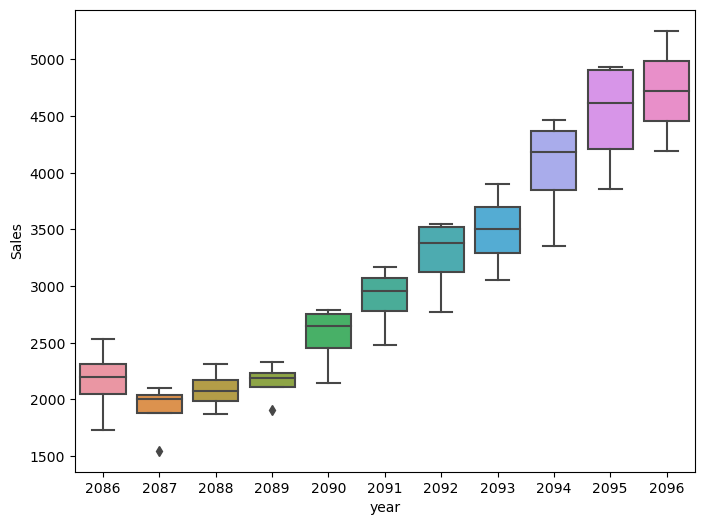

In [15]:
#boxplot for ever
plt.figure(figsize=(8,6))
#plt subplot
sns.boxplot(x="year",y="Sales",data=df)

<Axes: xlabel='year', ylabel='Sales'>

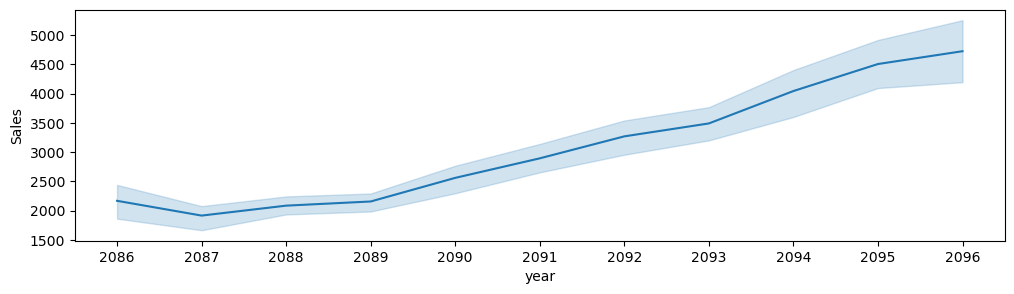

In [16]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=df)

<Axes: >

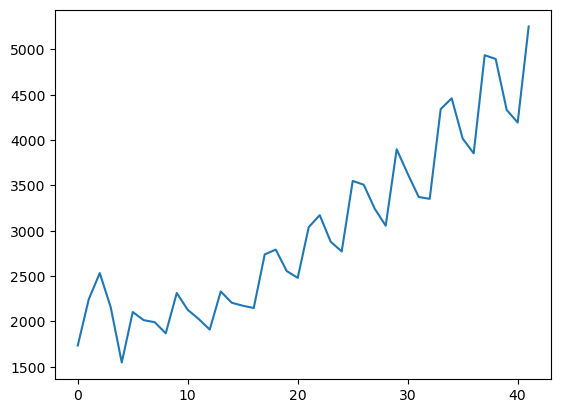

In [17]:
df.Sales.plot()

<Axes: xlabel='year'>

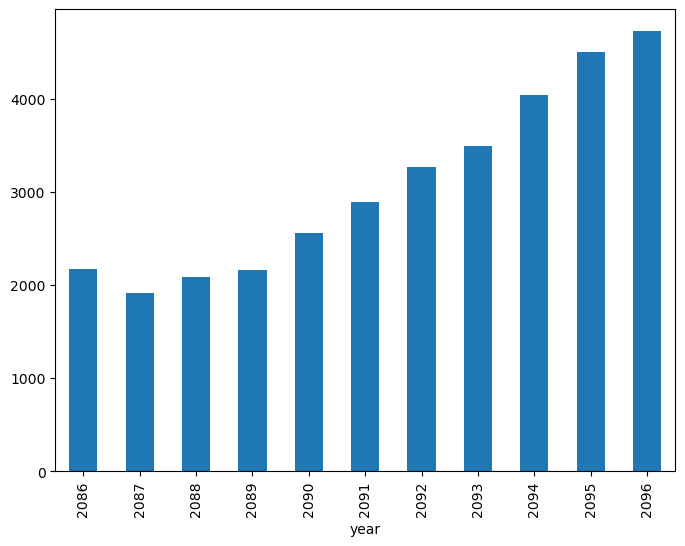

In [18]:
plt.figure(figsize=(8,6))
df.groupby('year')['Sales'].mean().plot(kind='bar')

<Axes: xlabel='month'>

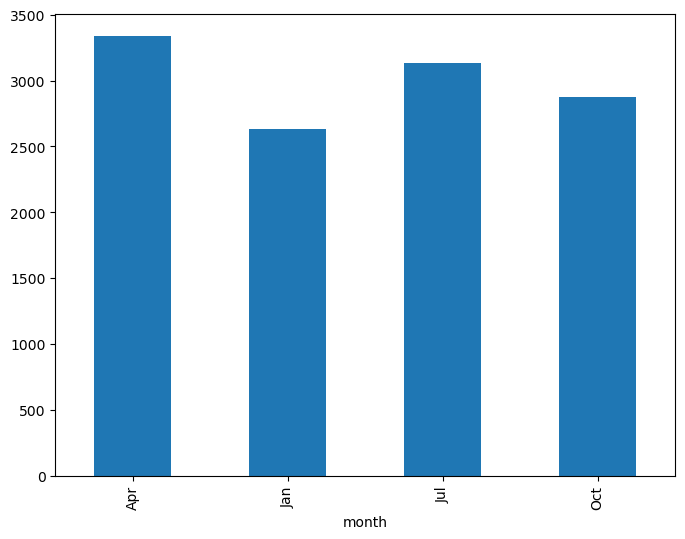

In [19]:
plt.figure(figsize=(8,6))
df.groupby('month')['Sales'].mean().plot(kind='bar')

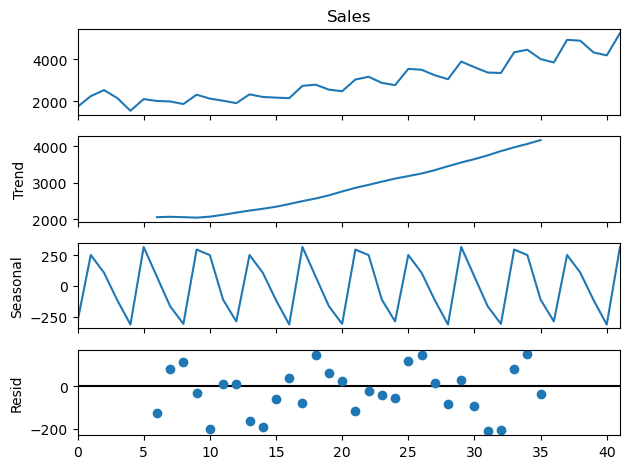

In [20]:
#Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [21]:
df_trans=df.copy()

In [22]:
df_trans['t']= np.arange(1,43)

In [23]:
df_trans['log']= np.log(df['Sales']) #log transform of data

In [24]:
df_trans['t_sq']= df['Sales']*df['Sales'] # taking sq

In [25]:
df_trans

,Quarter,Sales,Month,month,year,t,log,t_sq
0,Q1_86,1734.827000,2086-01-01,Jan,2086,1,7.458663,3.009625e+06
1,Q2_86,2244.960999,2086-04-01,Apr,2086,2,7.716443,5.039850e+06
2,Q3_86,2533.804993,2086-07-01,Jul,2086,3,7.837477,6.420168e+06
3,Q4_86,2154.962997,2086-10-01,Oct,2086,4,7.675529,4.643866e+06
4,Q1_87,1547.818996,2087-01-01,Jan,2087,5,7.344602,2.395744e+06
5,Q2_87,2104.411995,2087-04-01,Apr,2087,6,7.651791,4.428550e+06
6,Q3_87,2014.362999,2087-07-01,Jul,2087,7,7.608058,4.057658e+06
7,Q4_87,1991.746998,2087-10-01,Oct,2087,8,7.596767,3.967056e+06
8,Q1_88,1869.049999,2088-01-01,Jan,2088,9,7.533186,3.493348e+06
9,Q2_88,2313.631996,2088-04-01,Apr,2088,10,7.746574,5.352893e+06


In [26]:
train= df_trans.head(int(len(df_trans['Sales'])*0.7))
train

,Quarter,Sales,Month,month,year,t,log,t_sq
0,Q1_86,1734.827000,2086-01-01,Jan,2086,1,7.458663,3.009625e+06
1,Q2_86,2244.960999,2086-04-01,Apr,2086,2,7.716443,5.039850e+06
2,Q3_86,2533.804993,2086-07-01,Jul,2086,3,7.837477,6.420168e+06
3,Q4_86,2154.962997,2086-10-01,Oct,2086,4,7.675529,4.643866e+06
4,Q1_87,1547.818996,2087-01-01,Jan,2087,5,7.344602,2.395744e+06
5,Q2_87,2104.411995,2087-04-01,Apr,2087,6,7.651791,4.428550e+06
6,Q3_87,2014.362999,2087-07-01,Jul,2087,7,7.608058,4.057658e+06
7,Q4_87,1991.746998,2087-10-01,Oct,2087,8,7.596767,3.967056e+06
8,Q1_88,1869.049999,2088-01-01,Jan,2088,9,7.533186,3.493348e+06
9,Q2_88,2313.631996,2088-04-01,Apr,2088,10,7.746574,5.352893e+06


In [27]:
test= df_trans.tail(int(len(df_trans['Sales'])-len(train)))

In [28]:
test

,Quarter,Sales,Month,month,year,t,log,t_sq
29,Q2_93,3899.0,2093-04-01,Apr,2093,30,8.268475,15202201.0
30,Q3_93,3629.0,2093-07-01,Jul,2093,31,8.196712,13169641.0
31,Q4_93,3373.0,2093-10-01,Oct,2093,32,8.123558,11377129.0
32,Q1_94,3352.0,2094-01-01,Jan,2094,33,8.117312,11235904.0
33,Q2_94,4342.0,2094-04-01,Apr,2094,34,8.376090,18852964.0
34,Q3_94,4461.0,2094-07-01,Jul,2094,35,8.403128,19900521.0
35,Q4_94,4017.0,2094-10-01,Oct,2094,36,8.298291,16136289.0
36,Q1_95,3854.0,2095-01-01,Jan,2095,37,8.256867,14853316.0
37,Q2_95,4936.0,2095-04-01,Apr,2095,38,8.504311,24364096.0
38,Q3_95,4895.0,2095-07-01,Jul,2095,39,8.495970,23961025.0


In [30]:
#linear model
linear_model=smf.ols('Sales~t',data=train).fit()
pred_linear= pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

799.0289039914887

In [31]:
print('predicted data')
pred_linear.head(10)

predicted data


29    3226.897262
30    3278.288484
31    3329.679706
32    3381.070928
33    3432.462150
34    3483.853373
35    3535.244595
36    3586.635817
37    3638.027039
38    3689.418261
dtype: float64

In [32]:
print('original data')
test['Sales'].head(10)

original data


29    3899.0
30    3629.0
31    3373.0
32    3352.0
33    4342.0
34    4461.0
35    4017.0
36    3854.0
37    4936.0
38    4895.0
Name: Sales, dtype: float64

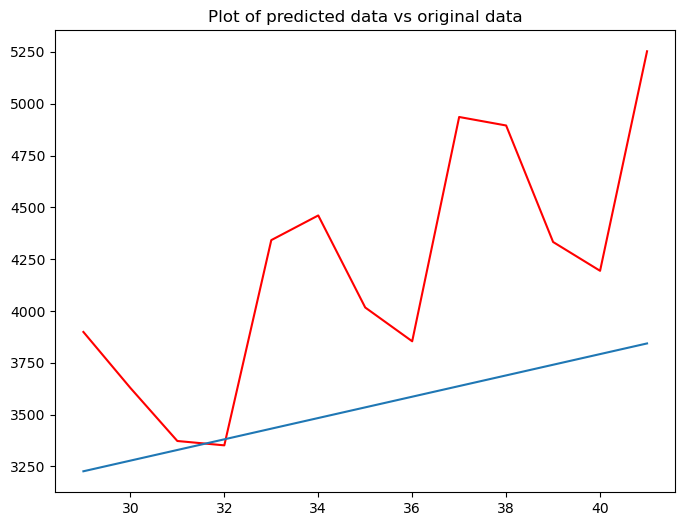

In [33]:
plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs original data')
plt.plot(test['Sales'],color='r')
plt.plot(pred_linear, )

In [34]:
#quadratic
Quad = smf.ols('Sales~t+t_sq',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[['t','t_sq']]))
rmse_Quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

580.9914377956477

In [35]:
print('predicted data')
pred_Quad.head(10)

predicted data


29    4143.910097
30    3768.171688
31    3437.068797
32    3413.013045
33    4831.564916
34    5028.556209
35    4330.823541
36    4094.466441
37    5865.144446
38    5792.399965
dtype: float64

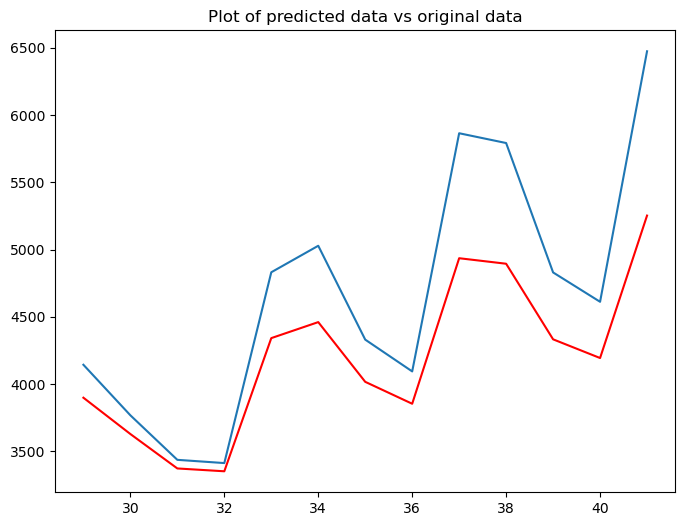

In [36]:
plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs original data')
plt.plot(test['Sales'],color='r')
plt.plot(pred_Quad, )

In [37]:
#exponential
exp= smf.ols('log~t',data=train).fit()
pred_exp= pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

637.5585943826396

In [38]:
print('predicted data')
pred_exp.head(10)

predicted data


29    8.092446
30    8.112987
31    8.133528
32    8.154069
33    8.174611
34    8.195152
35    8.215693
36    8.236234
37    8.256775
38    8.277317
dtype: float64

In [39]:
print('original data')
test['Sales'].head(10)

original data


29    3899.0
30    3629.0
31    3373.0
32    3352.0
33    4342.0
34    4461.0
35    4017.0
36    3854.0
37    4936.0
38    4895.0
Name: Sales, dtype: float64

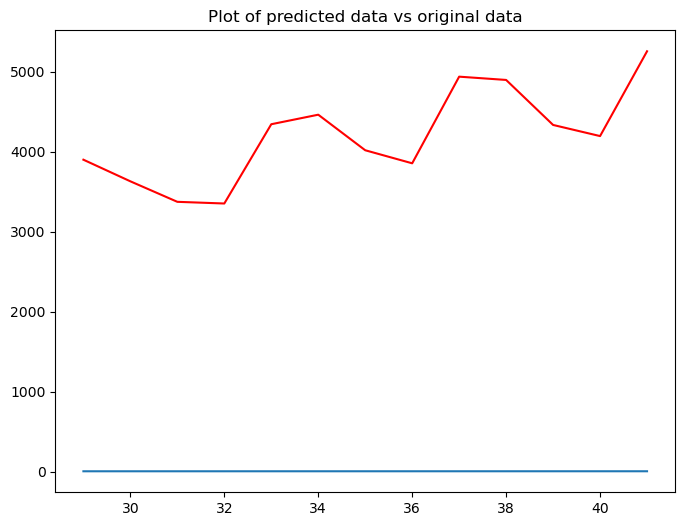

In [40]:
plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs original data')
plt.plot(test['Sales'],color='r')
plt.plot(pred_exp, )

In [41]:
#log with Sq
exp= smf.ols('log~t+t_sq',data=train).fit()
pred_log_sq= pd.Series(exp.predict(test[['t','t_sq']]))
rmse_log_sq=np.sqrt(np.mean((np.array(test['log'])-np.array(pred_log_sq))**2))
rmse_log_sq

0.38401316680246866

In [42]:
print('predicted data')
pred_log_sq.head(10)

predicted data


29    8.444445
30    8.301031
31    8.174750
32    8.166330
33    8.711662
34    8.788093
35    8.521079
36    8.431167
37    9.111664
38    9.084555
dtype: float64

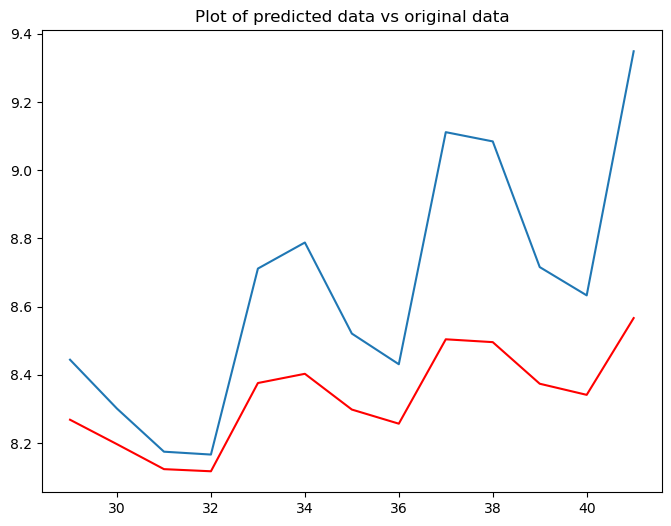

In [43]:
plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs original data')
plt.plot(test['log'],color='r')
plt.plot(pred_log_sq, )

In [44]:
data={"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_exp","rmse_log_sq"]),"RMSE_Values":pd.Series
      ([rmse_linear,rmse_Quad,rmse_exp,rmse_log_sq])}

In [45]:
type(data)

dict

In [46]:
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_log_sq,0.384013
1,rmse_Quad,580.991438
2,rmse_exp,637.558594
0,rmse_linear,799.028904


In [47]:
#predicting new data
df_trans

,Quarter,Sales,Month,month,year,t,log,t_sq
0,Q1_86,1734.827000,2086-01-01,Jan,2086,1,7.458663,3.009625e+06
1,Q2_86,2244.960999,2086-04-01,Apr,2086,2,7.716443,5.039850e+06
2,Q3_86,2533.804993,2086-07-01,Jul,2086,3,7.837477,6.420168e+06
3,Q4_86,2154.962997,2086-10-01,Oct,2086,4,7.675529,4.643866e+06
4,Q1_87,1547.818996,2087-01-01,Jan,2087,5,7.344602,2.395744e+06
5,Q2_87,2104.411995,2087-04-01,Apr,2087,6,7.651791,4.428550e+06
6,Q3_87,2014.362999,2087-07-01,Jul,2087,7,7.608058,4.057658e+06
7,Q4_87,1991.746998,2087-10-01,Oct,2087,8,7.596767,3.967056e+06
8,Q1_88,1869.049999,2088-01-01,Jan,2088,9,7.533186,3.493348e+06
9,Q2_88,2313.631996,2088-04-01,Apr,2088,10,7.746574,5.352893e+06


In [48]:
#Build model on entire data set
model_full= smf.ols('log~t+t_sq',data=df_trans).fit()

In [49]:
pred_new  = pd.Series(np.exp(model_full.predict(df_trans)))
pred_new

0     1881.898498
1     2022.364802
2     2130.560127
3     2038.058968
4     1921.654076
5     2065.250722
6     2062.318664
7     2077.113572
8     2067.655147
9     2210.422239
10    2176.975322
11    2170.509851
12    2161.688559
13    2305.611855
14    2288.683547
15    2301.432044
16    2316.494581
17    2555.600348
18    2604.509890
19    2530.582897
20    2526.444562
21    2803.866179
22    2904.023596
23    2778.164760
24    2754.464253
25    3233.323104
26    3236.090531
27    3094.916178
28    3014.690669
29    3642.468199
30    3457.134781
31    3305.400130
32    3323.964506
33    4237.382636
34    4418.896390
35    3977.795548
36    3862.917924
37    5217.954012
38    5205.422451
39    4486.478529
40    4369.946031
41    5992.587931
dtype: float64